# Partidos de League Of Legends SoloQ a los 15 min

## Importando Librerias

In [4]:
pip install scipy

     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 46.2/46.2 MB 19.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from plotly.subplots import make_subplots
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from scipy import stats
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
plt.style.use("ggplot")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_info_columns', 200)

ModuleNotFoundError: No module named 'tqdm'

## Importando información

In [2]:
infoMatchesLol = pd.read_csv("match_data_v5.csv")
infoMatchesLol.head(5)

Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  Unnamed: 29
0  EUW1_6882489515'           2          23           4           2           0           0           0           7           0          388          106        23923        29798        21842            6           34           16            0            0            2            0            1          400           94        29637        32613        27239            1            0
1  EUW1_6882416210'           2          46          12           1           0           1           0          10           0          348           98        27852        30530        35817            6           26           17            0            0            1            0            4          373           76        28970        30320        36585            0            0
2  EUW1_6881092720'           2          19          13           0           0           0           0          11           0          331           96        28126        29501        38039            3          241           18            1            0            2            0            3          340           84        30510        29464        42984            0            0
3  EUW1_6879405717'           3          28           8           0           1           1           0           9           1          355           84        27333        30466        31338            0           23           10            1            0            0            0            5          378           87        25157        31069        28229            0            0
4  EUW1_6879389461'           3          30          11           1           1           1           0           7           0          370          100        27772        31066        26676            7           26            7            1            0            1            0            5          382           96        26052        29475        19245            1            0

In [3]:
infoMatchesLol.columns =["matchID","blueTeamControlWardsPlaced","blueTeamWardsPlaced","blueTeamTotalKills","blueTeamDragonKills","blueTeamHeraldKills","blueTeamTowersDestroyed","blueTeamInhibitorsDestroyed","blueTeamTurretPlatesDestroyed","blueTeamFirstBlood","blueTeamMinionsKilled","blueTeamJungleMinions","blueTeamTotalGold","blueTeamXp","blueTeamTotalDamageToChamps","redTeamControlWardsPlaced","redTeamWardsPlaced","redTeamTotalKills","redTeamDragonKills","redTeamHeraldKills","redTeamTowersDestroyed","redTeamInhibitorsDestroyed","redTeamTurretPlatesDestroyed","redTeamMinionsKilled","redTeamJungleMinions","redTeamTotalGold","redTeamXp","redTeamTotalDamageToChamps","blueWin","empty"]
infoMatchesLol = infoMatchesLol.drop(columns=['empty'])

In [4]:
infoMatchesLol.head(5)

matchID  blueTeamControlWardsPlaced  blueTeamWardsPlaced  blueTeamTotalKills  blueTeamDragonKills  blueTeamHeraldKills  blueTeamTowersDestroyed  blueTeamInhibitorsDestroyed  blueTeamTurretPlatesDestroyed  blueTeamFirstBlood  blueTeamMinionsKilled  blueTeamJungleMinions  blueTeamTotalGold  blueTeamXp  blueTeamTotalDamageToChamps  redTeamControlWardsPlaced  redTeamWardsPlaced  redTeamTotalKills  redTeamDragonKills  redTeamHeraldKills  redTeamTowersDestroyed  redTeamInhibitorsDestroyed  redTeamTurretPlatesDestroyed  redTeamMinionsKilled  redTeamJungleMinions  redTeamTotalGold  redTeamXp  redTeamTotalDamageToChamps  blueWin
0  EUW1_6882489515'                           2                   23                   4                    2                    0                        0                            0                              7                   0                    388                    106              23923       29798                        21842                          6                  34                 16                   0                   0                       2                           0                             1                   400                    94             29637      32613                       27239        1
1  EUW1_6882416210'                           2                   46                  12                    1                    0                        1                            0                             10                   0                    348                     98              27852       30530                        35817                          6                  26                 17                   0                   0                       1                           0                             4                   373                    76             28970      30320                       36585        0
2  EUW1_6881092720'                           2                   19                  13                    0                    0                        0                            0                             11                   0                    331                     96              28126       29501                        38039                          3                 241                 18                   1                   0                       2                           0                             3                   340                    84             30510      29464                       42984        0
3  EUW1_6879405717'                           3                   28                   8                    0                    1                        1                            0                              9                   1                    355                     84              27333       30466                        31338                          0                  23                 10                   1                   0                       0                           0                             5                   378                    87             25157      31069                       28229        0
4  EUW1_6879389461'                           3                   30                  11                    1                    1                        1                            0                              7                   0                    370                    100              27772       31066                        26676                          7                  26                  7                   1                   0                       1                           0                             5                   382                    96             26052      29475                       19245        1

## Descripción de los datos

In [5]:
infoMatchesLol.describe()

blueTeamControlWardsPlaced  blueTeamWardsPlaced  blueTeamTotalKills  blueTeamDragonKills  blueTeamHeraldKills  blueTeamTowersDestroyed  blueTeamInhibitorsDestroyed  blueTeamTurretPlatesDestroyed  blueTeamFirstBlood  blueTeamMinionsKilled  blueTeamJungleMinions  blueTeamTotalGold    blueTeamXp  blueTeamTotalDamageToChamps  redTeamControlWardsPlaced  redTeamWardsPlaced  redTeamTotalKills  redTeamDragonKills  redTeamHeraldKills  redTeamTowersDestroyed  redTeamInhibitorsDestroyed  redTeamTurretPlatesDestroyed  redTeamMinionsKilled  redTeamJungleMinions  redTeamTotalGold     redTeamXp  redTeamTotalDamageToChamps      blueWin
count                24225.000000         24225.000000        24225.000000         24225.000000         24225.000000             24225.000000                 24225.000000                   24225.000000        24225.000000           24225.000000           24225.000000       24225.000000  24225.000000                 24225.000000               24225.000000        24225.000000       24225.000000        24225.000000        24225.000000            24225.000000                24225.000000                  24225.000000          24225.000000          24225.000000      24225.000000  24225.000000                24225.000000  24225.00000
mean                     3.610815            41.362023           12.792487             0.737833             0.123591                 0.654902                     0.002023                       8.915789            0.503860             349.240578              88.011393       27831.717771  29572.765119                 32173.245697                   3.643302           43.410898          12.863529            0.905635            0.103117                0.955088                    0.001527                      3.884045            350.287554             88.547368      27788.709391  29619.035789                32156.531682      0.49453
std                      2.018622            43.471913            4.910510             0.722126             0.329247                 0.885749                     0.054101                       3.083976            0.499995              31.339593              14.025502        2740.935799   1879.301846                  6131.399121                   2.026358           46.955275           4.850884            0.747582            0.304117                0.981776                    0.044021                      2.591134             31.593160             14.120346       2694.330794   1896.275564                 6041.175604      0.49998
min                      0.000000             9.000000            0.000000             0.000000             0.000000                 0.000000                     0.000000                       0.000000            0.000000             194.000000               0.000000       17719.000000  19061.000000                 11022.000000                   0.000000            9.000000           0.000000            0.000000            0.000000                0.000000                    0.000000                      0.000000            188.000000              0.000000      18247.000000  17602.000000                10383.000000      0.00000
25%                      2.000000            25.000000            9.000000             0.000000             0.000000                 0.000000                     0.000000                       7.000000            0.000000             329.000000              78.000000       25912.000000  28341.000000                 27933.000000                   2.000000           25.000000           9.000000            0.000000            0.000000                0.000000                    0.000000                      2.000000            330.000000             79.000000      25910.000000  28387.000000                28024.000000      0.00000
50%                      3.000000            29.000000           12.000000             1.000000             0.000000                 0.000000                     0.000000                       9.00

In [6]:
infoMatchesLol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24225 entries, 0 to 24224
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   matchID                        24225 non-null  object
 1   blueTeamControlWardsPlaced     24225 non-null  int64 
 2   blueTeamWardsPlaced            24225 non-null  int64 
 3   blueTeamTotalKills             24225 non-null  int64 
 4   blueTeamDragonKills            24225 non-null  int64 
 5   blueTeamHeraldKills            24225 non-null  int64 
 6   blueTeamTowersDestroyed        24225 non-null  int64 
 7   blueTeamInhibitorsDestroyed    24225 non-null  int64 
 8   blueTeamTurretPlatesDestroyed  24225 non-null  int64 
 9   blueTeamFirstBlood             24225 non-null  int64 
 10  blueTeamMinionsKilled          24225 non-null  int64 
 11  blueTeamJungleMinions          24225 non-null  int64 
 12  blueTeamTotalGold              24225 non-null  int64 
 13  b

## Count categorical and numerical variables

In [7]:
categorical_features = infoMatchesLol.select_dtypes(include = ['object']).columns.tolist()
numericalfloat64_features = infoMatchesLol.select_dtypes(include = ['float64']).columns.tolist()
numericalint64_features = infoMatchesLol.select_dtypes(include = ['int64']).columns.tolist()

print('Number of categorical independent features: ', len(categorical_features))
print('Number of numerical float64 independent features: ', len(numericalfloat64_features))
print('Number of numerical int64 independent features: ', len(numericalint64_features))

Number of categorical independent features:  1
Number of numerical float64 independent features:  0
Number of numerical int64 independent features:  28


In [8]:
blue_num_int64_features = numericalint64_features[:14]
print(len(blue_num_int64_features), blue_num_int64_features)
red_num_int64_features = numericalint64_features[14:-1]
print(len(red_num_int64_features), red_num_int64_features)

14 ['blueTeamControlWardsPlaced', 'blueTeamWardsPlaced', 'blueTeamTotalKills', 'blueTeamDragonKills', 'blueTeamHeraldKills', 'blueTeamTowersDestroyed', 'blueTeamInhibitorsDestroyed', 'blueTeamTurretPlatesDestroyed', 'blueTeamFirstBlood', 'blueTeamMinionsKilled', 'blueTeamJungleMinions', 'blueTeamTotalGold', 'blueTeamXp', 'blueTeamTotalDamageToChamps']
13 ['redTeamControlWardsPlaced', 'redTeamWardsPlaced', 'redTeamTotalKills', 'redTeamDragonKills', 'redTeamHeraldKills', 'redTeamTowersDestroyed', 'redTeamInhibitorsDestroyed', 'redTeamTurretPlatesDestroyed', 'redTeamMinionsKilled', 'redTeamJungleMinions', 'redTeamTotalGold', 'redTeamXp', 'redTeamTotalDamageToChamps']


In [9]:
infoMatchesLol.shape

(24225, 29)

In [10]:
def get_nan(dataframe):
    total_nan = dataframe.isnull().sum()
    percent_nan = round(dataframe.isnull().sum()/len(dataframe)*100, 2)
    nan_col = pd.concat([total_nan, percent_nan], axis=1, keys=['Total', 'Percent'])
    nan_col = nan_col[nan_col['Total'] > 0].sort_values(by = ['Total'], ascending = False)
    return nan_col

def eda(dataframe, features):
    data_info = [{"Minimum": dataframe[col].min(), "Maximum": dataframe[col].max(), "Mode": dataframe[col].mode()[0]} for col in features]
    return pd.DataFrame(data_info, index = features).T

## Deprecando información nula o sin valor

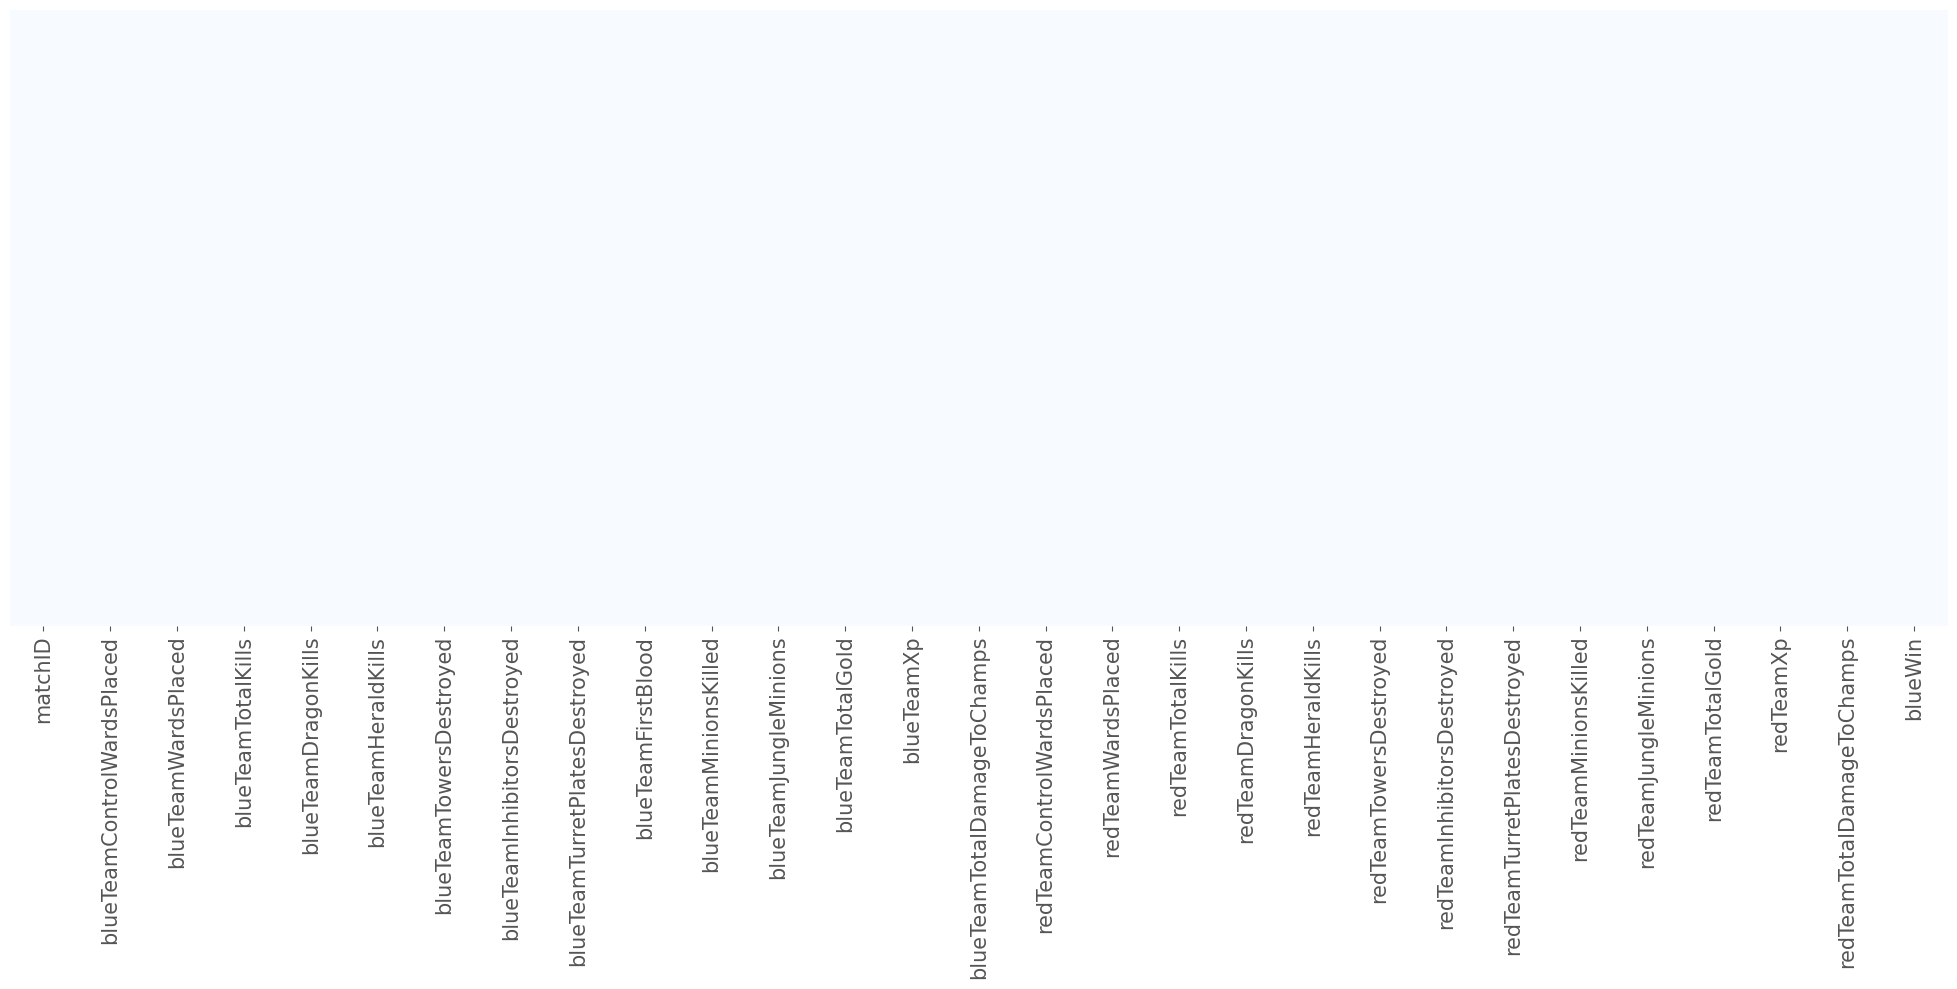

In [11]:
plt.figure(figsize = (25,8))
sns.heatmap(infoMatchesLol.isnull(), cbar=False, cmap='Blues', yticklabels=False)
plt.xticks(fontsize = 15,)
plt.ylabel(None)
plt.show()

In [12]:
infoMatchesLol = infoMatchesLol.drop(infoMatchesLol.columns[0], axis=1)

In [13]:
print(get_nan(infoMatchesLol).T)
print(infoMatchesLol.shape)

Empty DataFrame
Columns: []
Index: [Total, Percent]
(24225, 28)


## Análisis exploratorio de datos EDA
### Análisis de correlación de datos

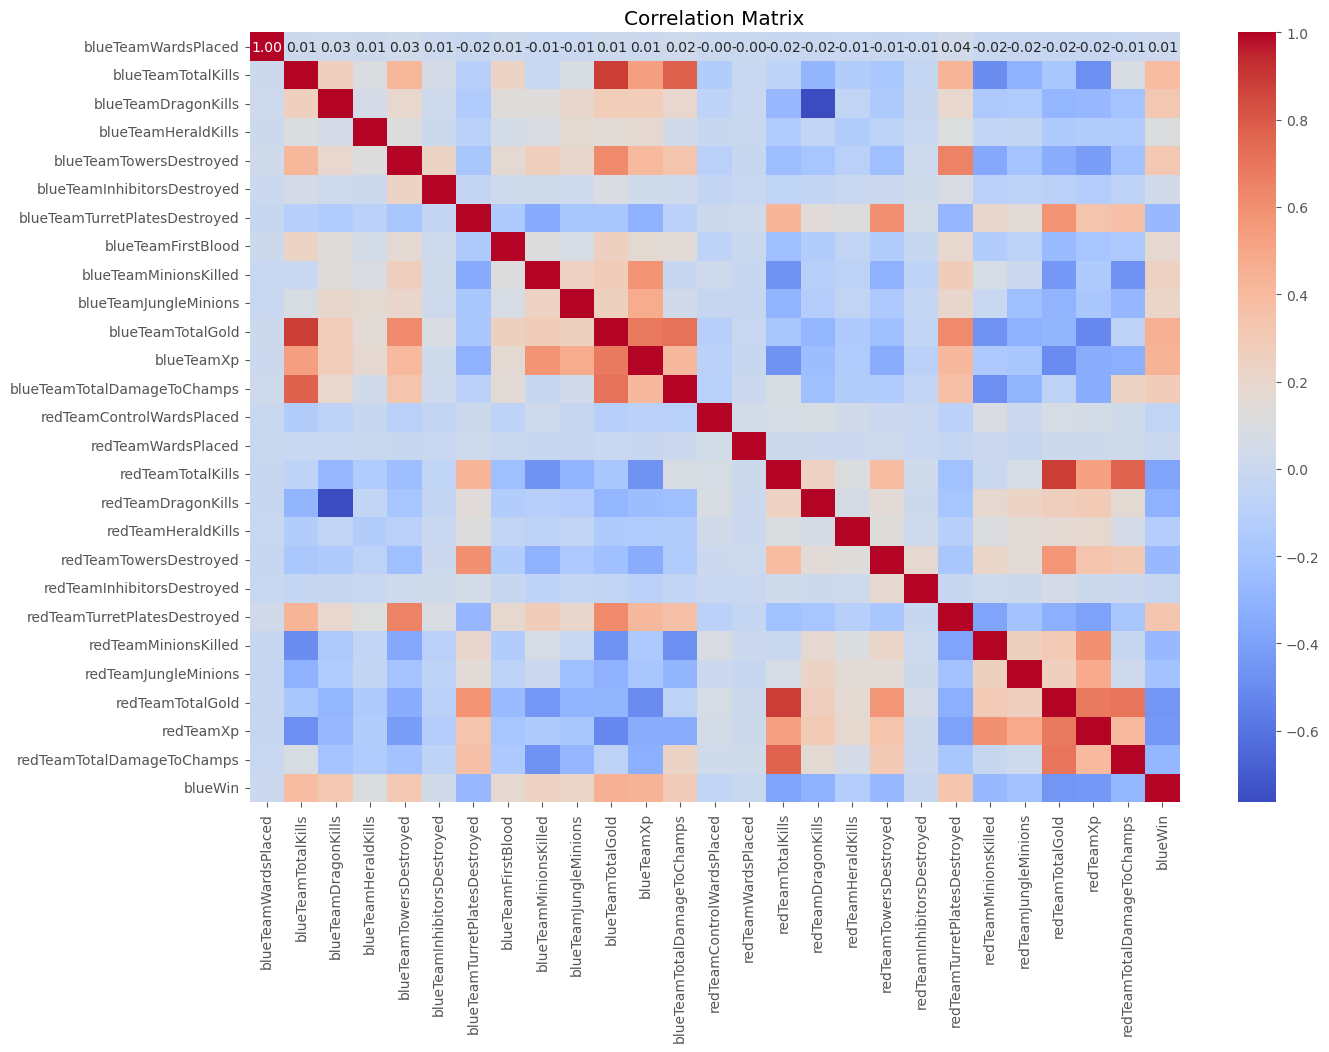

In [14]:
correlation_matrix = infoMatchesLol.iloc[:, list(range(1, infoMatchesLol.shape[1], 1))].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Manejando información incorrecta

In [15]:
infoMatchesLol.rename(columns={'blueTeamTurretPlatesDestroyed': 'redTeamTurretPlatesDestroyed', 'redTeamTurretPlatesDestroyed': 'blueTeamTurretPlatesDestroyed'}, inplace=True)
remove1 = infoMatchesLol[infoMatchesLol['blueTeamTurretPlatesDestroyed'] > 15].index
infoMatchesLol.drop(remove1, inplace=True)
remove2 = infoMatchesLol[infoMatchesLol['redTeamTurretPlatesDestroyed'] > 15].index
infoMatchesLol.drop(remove2, inplace=True)
print ("Training set size after removing wrong data:", infoMatchesLol.shape)

Training set size after removing wrong data: (23685, 28)


## Análisis de distribución de datos

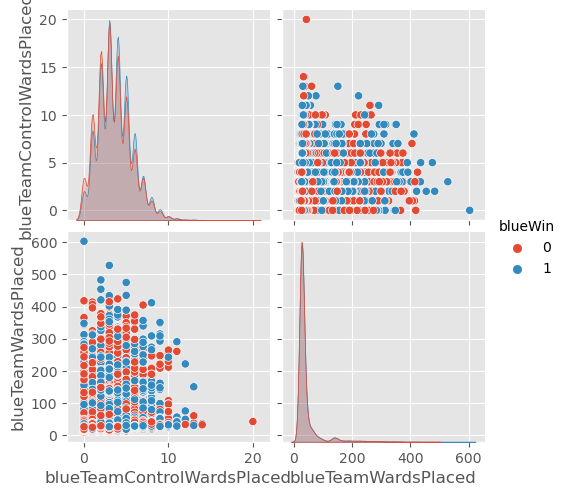

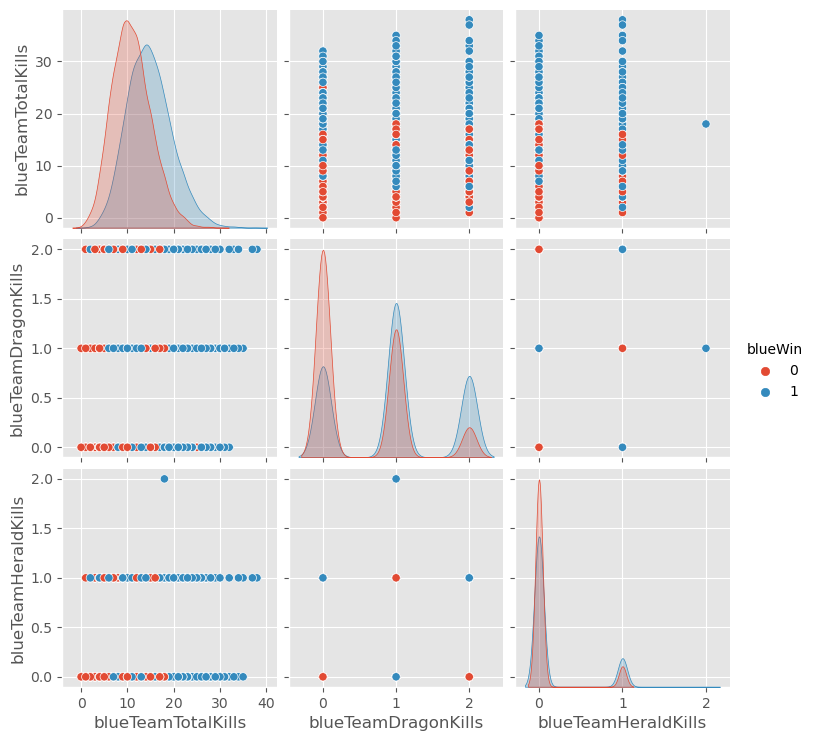

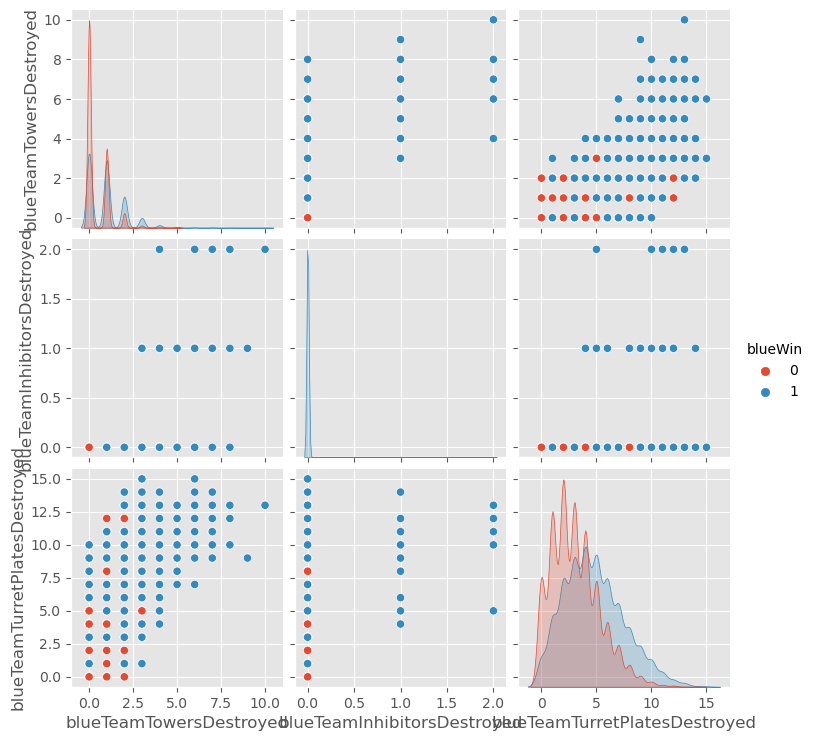

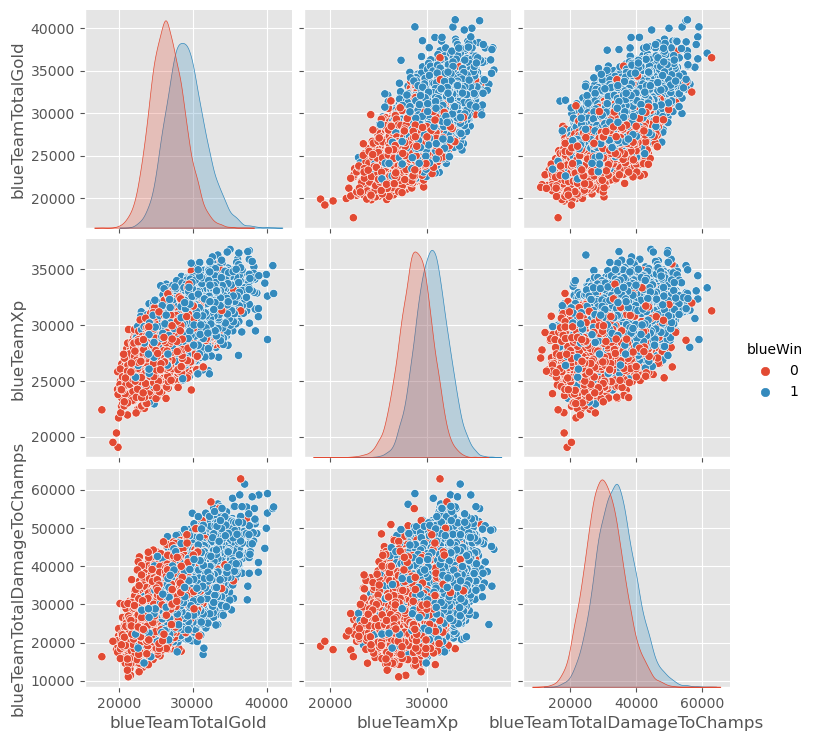

In [16]:
sns.pairplot(data=infoMatchesLol, vars=('blueTeamControlWardsPlaced','blueTeamWardsPlaced'), hue='blueWin')
plt.show()
sns.pairplot(data=infoMatchesLol, vars=('blueTeamTotalKills','blueTeamDragonKills','blueTeamHeraldKills'), hue='blueWin')
plt.show()
sns.pairplot(data=infoMatchesLol, vars=('blueTeamTowersDestroyed','blueTeamInhibitorsDestroyed', 'blueTeamTurretPlatesDestroyed'), hue='blueWin')
plt.show()
sns.pairplot(data=infoMatchesLol, vars=('blueTeamTotalGold','blueTeamXp','blueTeamTotalDamageToChamps'), hue='blueWin')
plt.show()

In [17]:
infoMatchesLol['diffMinionsKilled'] = (infoMatchesLol['blueTeamMinionsKilled'] - infoMatchesLol['redTeamMinionsKilled'])
infoMatchesLol['diffJungleMinions'] = (infoMatchesLol['blueTeamJungleMinions'] - infoMatchesLol['redTeamJungleMinions'])
infoMatchesLol['diffTotalGold'] = (infoMatchesLol['blueTeamTotalGold'] - infoMatchesLol['redTeamTotalGold'])
infoMatchesLol['diffTotalKills'] = (infoMatchesLol['blueTeamTotalKills'] - infoMatchesLol['redTeamTotalKills'])
infoMatchesLol['diffXp'] = (infoMatchesLol['blueTeamXp'] - infoMatchesLol['redTeamXp'])
infoMatchesLol['diffTotalDamageToChamps'] = (infoMatchesLol['blueTeamTotalDamageToChamps'] - infoMatchesLol['redTeamTotalDamageToChamps'])
infoMatchesLol['diffDragonKills'] = (infoMatchesLol['blueTeamDragonKills'] - infoMatchesLol['redTeamDragonKills'])
infoMatchesLol['diffHeraldKills'] = (infoMatchesLol['blueTeamHeraldKills'] - infoMatchesLol['redTeamHeraldKills'])
infoMatchesLol['diffTowersDestroyed'] = (infoMatchesLol['blueTeamTowersDestroyed'] - infoMatchesLol['redTeamTowersDestroyed'])
infoMatchesLol['diffInhibitorsDestroyed'] = (infoMatchesLol['blueTeamInhibitorsDestroyed'] - infoMatchesLol['redTeamInhibitorsDestroyed'])
infoMatchesLol['diffTurretPlatesDestroyed'] = (infoMatchesLol['blueTeamTurretPlatesDestroyed'] - infoMatchesLol['redTeamTurretPlatesDestroyed'])

In [ ]:
def fixDataFrame(dataFrame):
    dataFrame.rename(columns={'blueTeamTurretPlatesDestroyed': 'redTeamTurretPlatesDestroyed', 'redTeamTurretPlatesDestroyed': 'blueTeamTurretPlatesDestroyed'}, inplace=True)
    remove1 = dataFrame[dataFrame['blueTeamTurretPlatesDestroyed'] > 15].index
    dataFrame.drop(remove1, inplace=True)
    remove2 = dataFrame[dataFrame['redTeamTurretPlatesDestroyed'] > 15].index
    dataFrame.drop(remove2, inplace=True)
    dataFrame['diffMinionsKilled'] = (dataFrame['blueTeamMinionsKilled'] - dataFrame['redTeamMinionsKilled'])
    dataFrame['diffJungleMinions'] = (dataFrame['blueTeamJungleMinions'] - dataFrame['redTeamJungleMinions'])
    dataFrame['diffTotalGold'] = (dataFrame['blueTeamTotalGold'] - dataFrame['redTeamTotalGold'])
    dataFrame['diffTotalKills'] = (dataFrame['blueTeamTotalKills'] - dataFrame['redTeamTotalKills'])
    dataFrame['diffXp'] = (dataFrame['blueTeamXp'] - dataFrame['redTeamXp'])
    dataFrame['diffTotalDamageToChamps'] = (dataFrame['blueTeamTotalDamageToChamps'] - dataFrame['redTeamTotalDamageToChamps'])
    dataFrame['diffDragonKills'] = (dataFrame['blueTeamDragonKills'] - dataFrame['redTeamDragonKills'])
    dataFrame['diffHeraldKills'] = (dataFrame['blueTeamHeraldKills'] - dataFrame['redTeamHeraldKills'])
    dataFrame['diffTowersDestroyed'] = (dataFrame['blueTeamTowersDestroyed'] - dataFrame['redTeamTowersDestroyed'])
    dataFrame['diffInhibitorsDestroyed'] = (dataFrame['blueTeamInhibitorsDestroyed'] - dataFrame['redTeamInhibitorsDestroyed'])
    dataFrame['diffTurretPlatesDestroyed'] = (dataFrame['blueTeamTurretPlatesDestroyed'] - dataFrame['redTeamTurretPlatesDestroyed'])

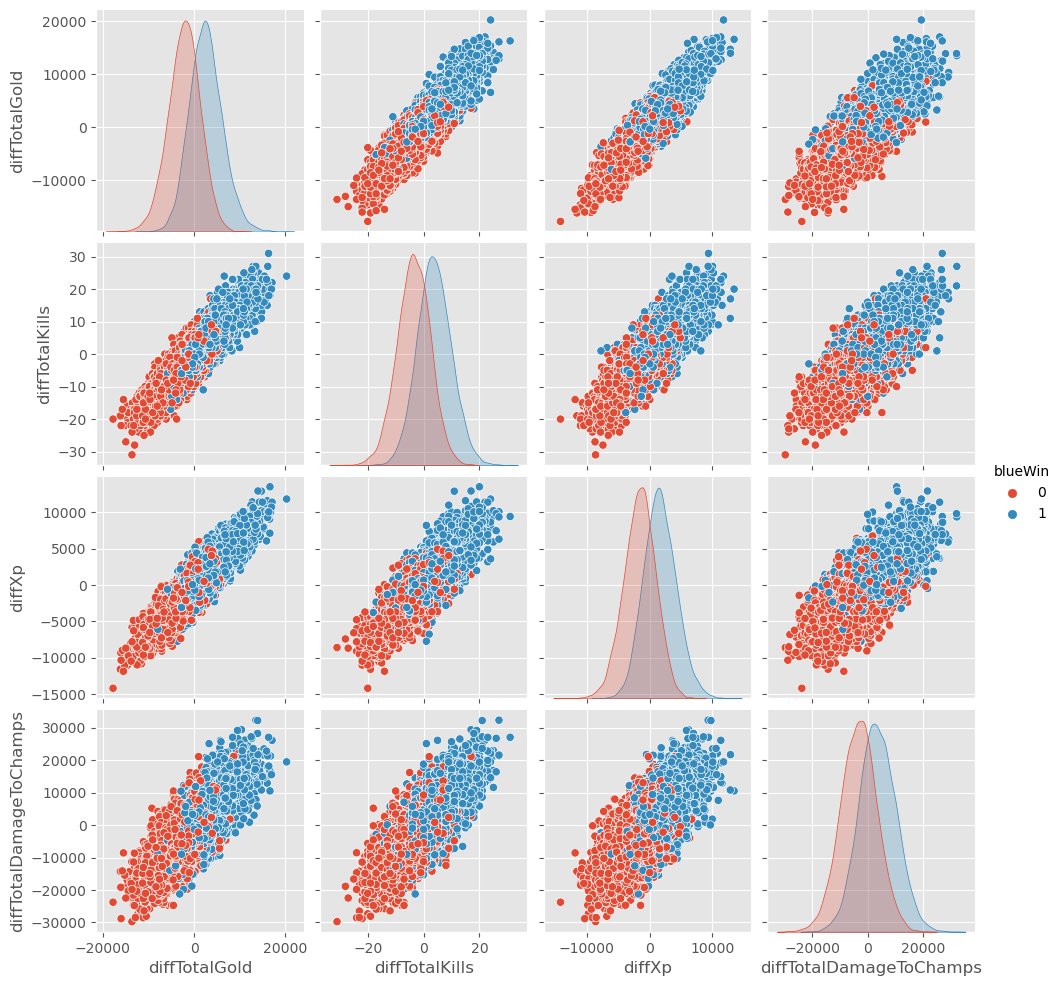

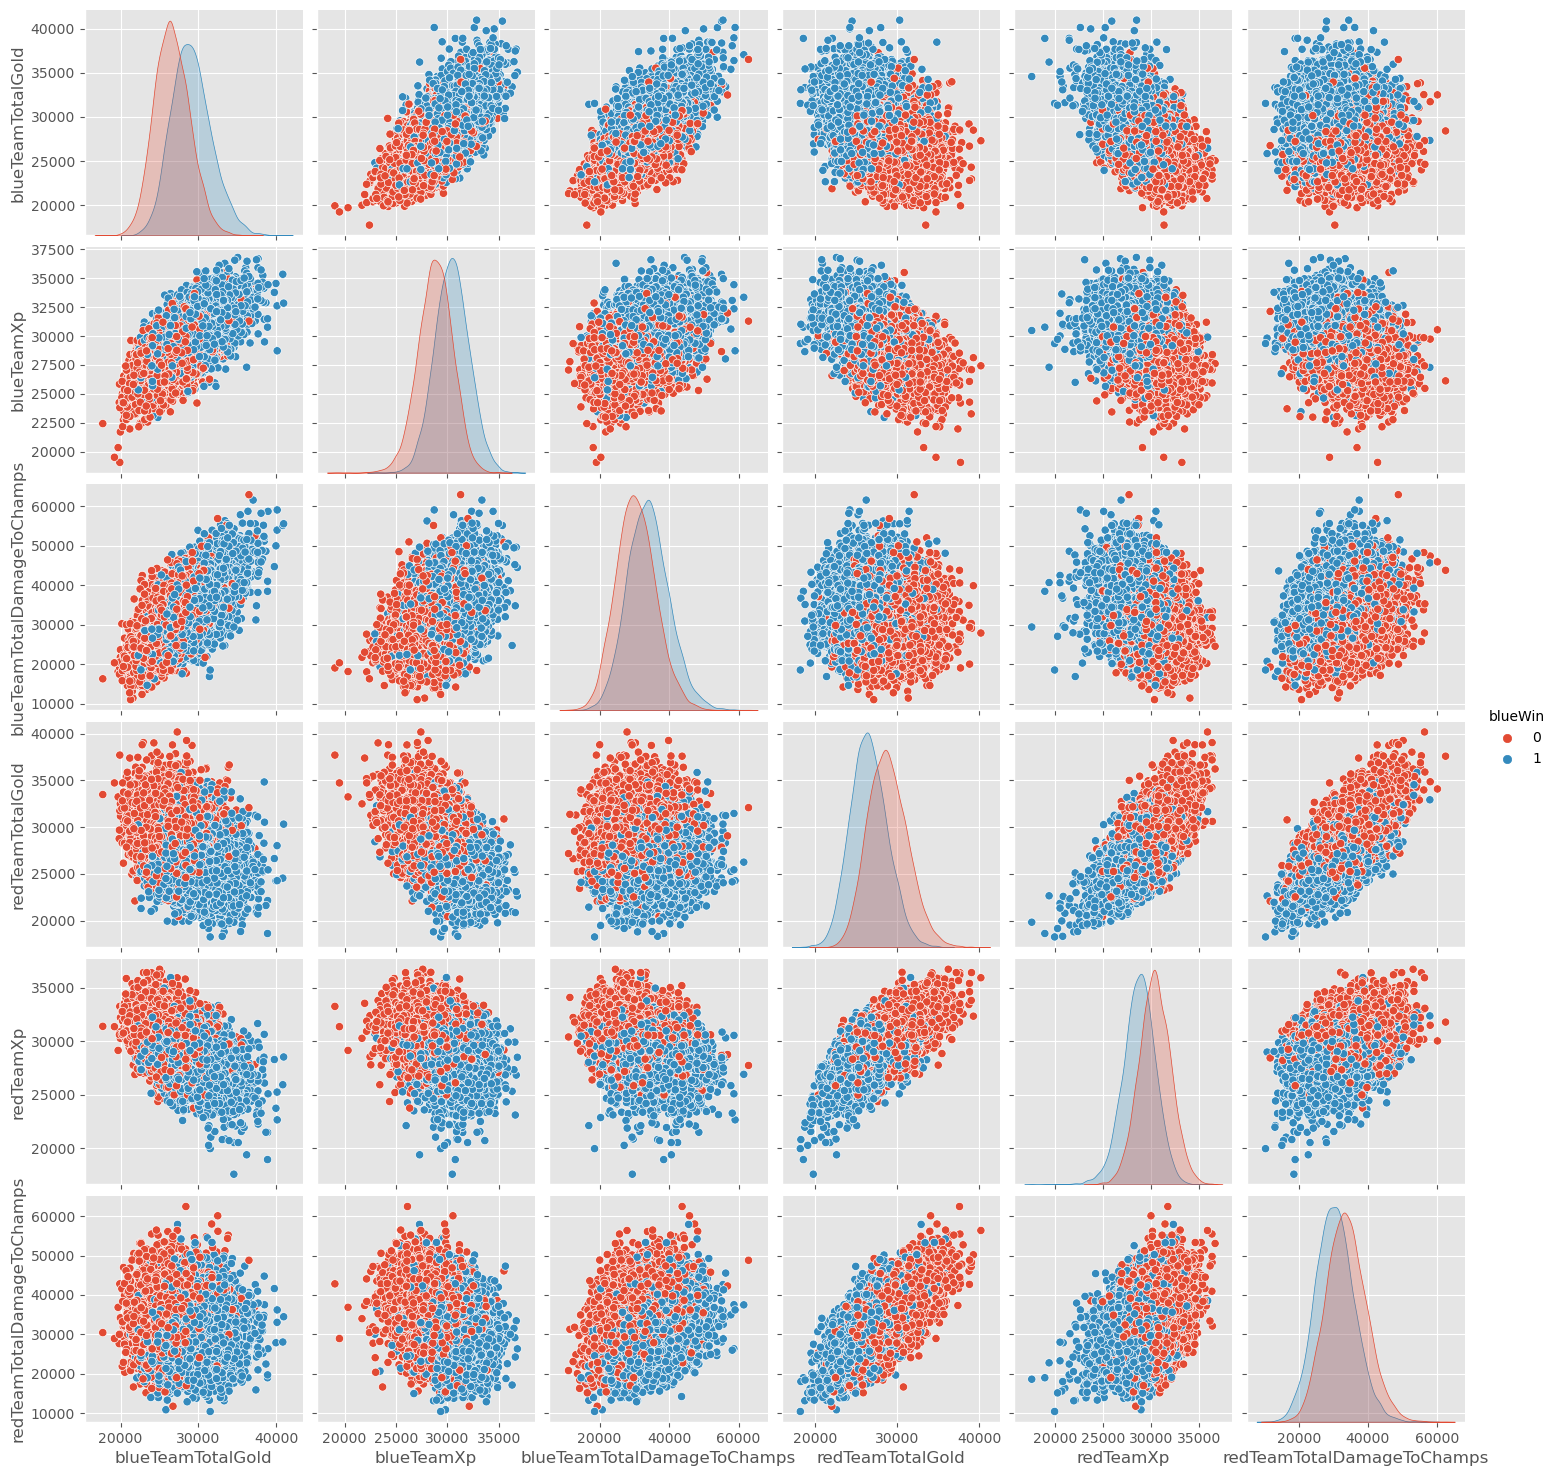

In [18]:
sns.pairplot(data=infoMatchesLol, vars=('diffTotalGold','diffTotalKills','diffXp','diffTotalDamageToChamps'), hue='blueWin')
plt.show()

sns.pairplot(data=infoMatchesLol, vars=('blueTeamTotalGold','blueTeamXp','blueTeamTotalDamageToChamps','redTeamTotalGold', 'redTeamXp', 'redTeamTotalDamageToChamps'), hue='blueWin')
plt.show()

14it [00:01,  9.74it/s]


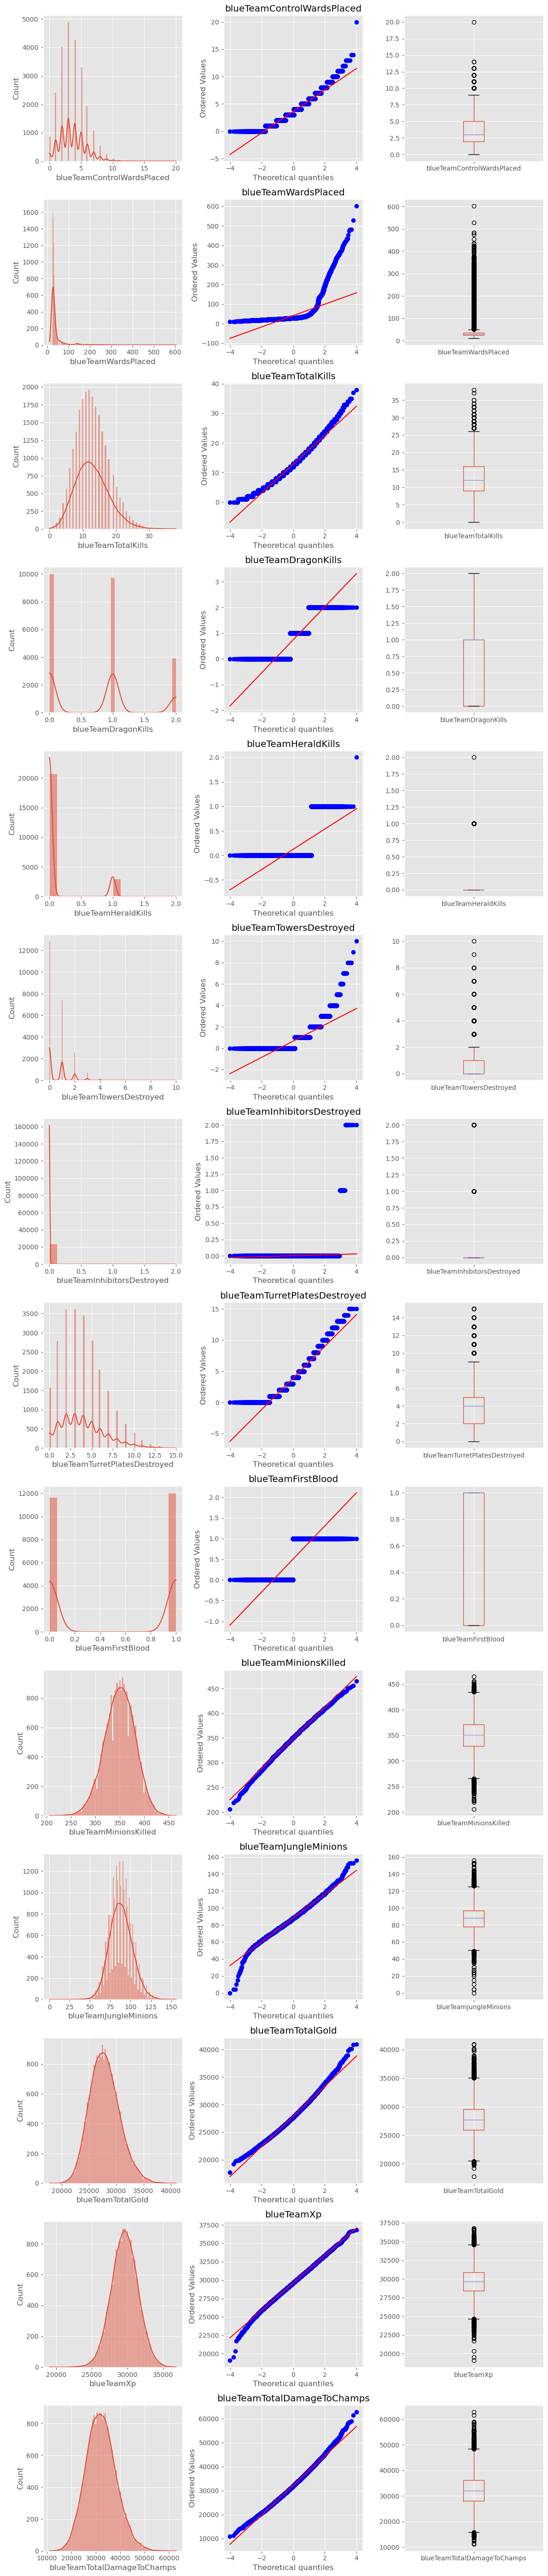

In [19]:
# Display the count, norm distribution, and boxplot of numerical features
fig, axes = plt.subplots(len(blue_num_int64_features), 3, figsize=(12, len(blue_num_int64_features)*4))


for i, col in tqdm(enumerate(blue_num_int64_features)):
    sns.histplot(infoMatchesLol[col], ax = axes[i, 0], kde =True)
    stats.probplot(infoMatchesLol[col].dropna(), dist='norm', plot=axes[i, 1])
    infoMatchesLol.boxplot(column=col, ax=axes[i, 2])
    axes[i, 1].set_title(col)

plt.tight_layout()
plt.show()

In [20]:

eda(infoMatchesLol, numericalint64_features)

blueTeamControlWardsPlaced  blueTeamWardsPlaced  blueTeamTotalKills  blueTeamDragonKills  blueTeamHeraldKills  blueTeamTowersDestroyed  blueTeamInhibitorsDestroyed  blueTeamTurretPlatesDestroyed  blueTeamFirstBlood  blueTeamMinionsKilled  blueTeamJungleMinions  blueTeamTotalGold  blueTeamXp  blueTeamTotalDamageToChamps  redTeamControlWardsPlaced  redTeamWardsPlaced  redTeamTotalKills  redTeamDragonKills  redTeamHeraldKills  redTeamTowersDestroyed  redTeamInhibitorsDestroyed  redTeamTurretPlatesDestroyed  redTeamMinionsKilled  redTeamJungleMinions  redTeamTotalGold  redTeamXp  redTeamTotalDamageToChamps  blueWin
Minimum                           0                   10                   0                    0                    0                        0                            0                              0                   0                    206                      0              17719       19061                        11022                          0                   9                  0                   0                   0                       0                           0                             0                   188                     0             18247      17602                       10383        0
Maximum                          20                  603                  38                    2                    2                       10                            2                             15                   1                    465                    156              40968       36801                        62857                         15                 576                 37                   2                   1                       8                           1                            15                   464                   156             40168      36715                       62452        1
Mode                              3                   27                  12                    0                    0                        0                            0                              3                   1                    347                     84              27236       29274                        30749                          3                  27                 11                   1                   0                       1                           0                             8                   355                    84             27309      29234                       30608        1

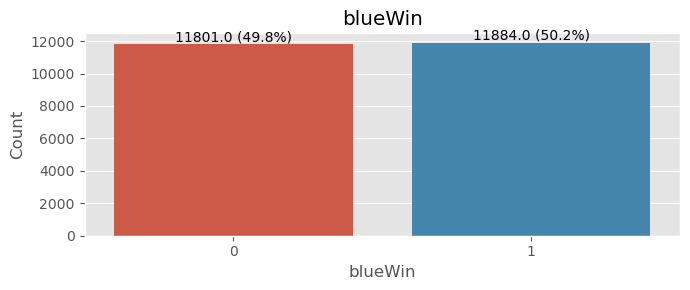

In [46]:
# Wont' do as the data is balanced
figure, axes = plt.subplots(figsize = (7, 3))

sns.countplot(data = infoMatchesLol, x = 'blueWin', ax = axes)
axes.set(title = 'blueWin', xlabel = "blueWin", ylabel = "Count")

total = len(infoMatchesLol['blueWin'])
for p in axes.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height/total)
    axes.annotate(f'{height} ({percentage})', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Data split

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

# features_lable = df.columns.difference(['blueWin'])
feature_lable = [
    # 'matchId',
    'blueTeamControlWardsPlaced',
    'blueTeamWardsPlaced',
    'blueTeamTotalKills',
    'blueTeamDragonKills',
    'blueTeamHeraldKills',
    'blueTeamTowersDestroyed',
    'blueTeamInhibitorsDestroyed',
    'blueTeamTurretPlatesDestroyed',
    'blueTeamFirstBlood',
    'blueTeamMinionsKilled',
    'blueTeamJungleMinions',
    'blueTeamTotalGold',
    'blueTeamXp',
    'blueTeamTotalDamageToChamps',

    'redTeamControlWardsPlaced',
    'redTeamWardsPlaced',
    'redTeamTotalKills',
    'redTeamDragonKills',
    'redTeamHeraldKills',
    'redTeamTowersDestroyed',
    'redTeamInhibitorsDestroyed',
    'redTeamTurretPlatesDestroyed',
    'redTeamMinionsKilled',
    'redTeamJungleMinions',
    'redTeamTotalGold',
    'redTeamXp',
    'redTeamTotalDamageToChamps',

    'diffMinionsKilled',
    'diffJungleMinions',
    'diffTotalGold',
    'diffTotalKills',
    'diffXp',
    'diffTotalDamageToChamps',

    'diffDragonKills',
    'diffHeraldKills',
    'diffTowersDestroyed',
    'diffInhibitorsDestroyed',
    'diffTurretPlatesDestroyed'
]

X = infoMatchesLol[feature_lable]
y = infoMatchesLol['blueWin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
print("Size of training set: {}".format(len(X_train)))
print("Size of test: {}".format(len(X_test)))
print(y.shape, X_train.shape)


Size of training set: 18948
Size of test: 4737
(23685,) (18948, 38)


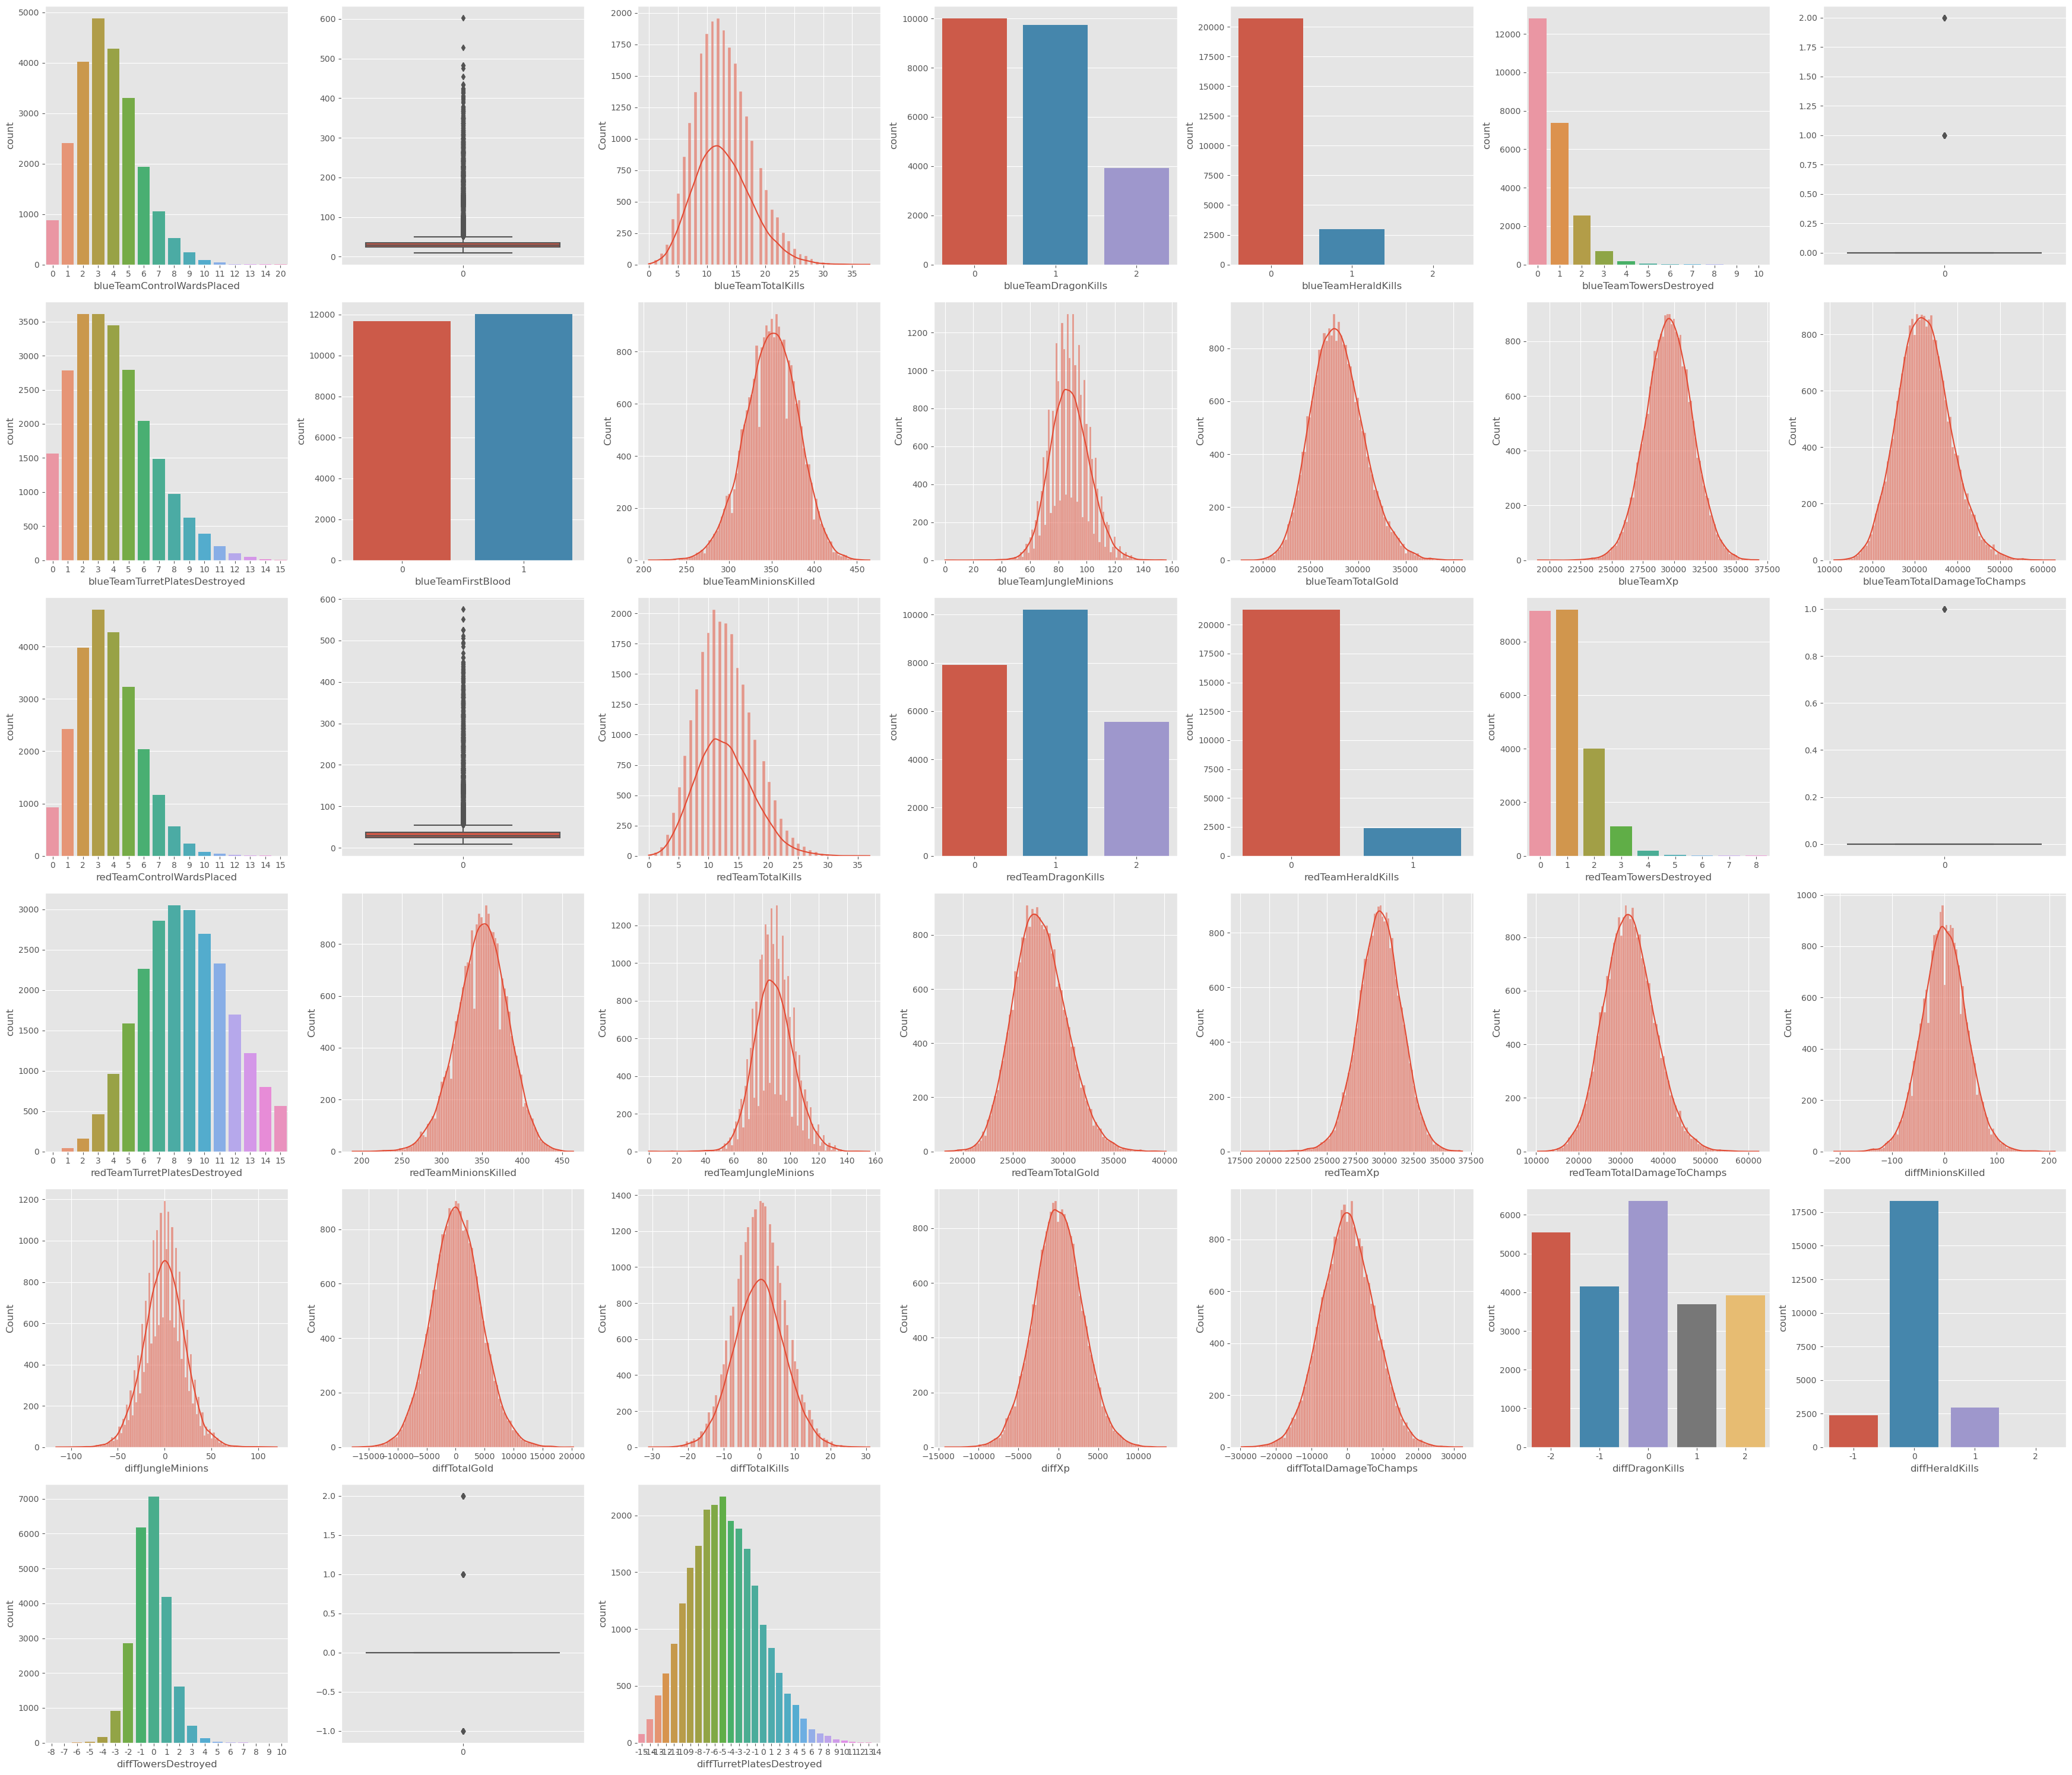

In [25]:
import matplotlib.pyplot as plt

n = len(feature_lable)
n_cols = 7
n_rows = n // n_cols if n % n_cols == 0 else n // n_cols + 1

fig, axs = plt.subplots(n_rows, n_cols, figsize=(35, n_rows*5))

for i, col in enumerate(feature_lable):
    if col == 'blueWin':
      continue
    r, c = i // n_cols, i % n_cols
    if i in [1, 6, 15, 20, 36]:
        sns.boxplot(infoMatchesLol[col], ax=axs[r, c])
    elif i in [0, 3, 4, 5, 6, 7, 8, 14, 17, 18, 19, 20, 21, 33, 34, 35, 37]:
        sns.countplot(x=col, data=infoMatchesLol, ax=axs[r, c])
    else:
        sns.histplot(infoMatchesLol[col], ax=axs[r, c], kde=True)

if n % n_cols != 0:
    for j in range(n, n_rows*n_cols):
        fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

def find_bestKfeatures(model, score_func=f_classif):
  k = -1
  max_score = 0
  for i in range(1, 39):
    selector = SelectKBest(score_func=score_func, k=i)
    pipeline = Pipeline([('selector', selector), ('model', model)])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("K: {}, score: {}".format(i, score))
    if score > max_score:
      k = i
      max_score = score
      selected_features_indices = selector.get_support(indices=True)
  print("The best K number: {}, score: {}".format(k, max_score))
  return list(selected_features_indices)

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix

cv = StratifiedKFold(n_splits = 5, shuffle = True)

def train_model_with_random_search(model, param_grid, X_train, y_train, X_test, y_test, skf):
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10,
                                       scoring='accuracy', n_jobs=-1, cv=skf)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    best_param = random_search.best_params_
    print('Best Parameters: ', best_param)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    print('F1 Score: ', f1)
    print('AUC(ROC): ', roc_auc)
    print()
    print("Classification Report: ")
    print(classification_report(y_test, y_pred))
    prob = best_model.predict_proba(X_test)
    prob = prob[:, 1]
    fper, tper, _ = roc_curve(y_test, prob)
    auc_scr = auc(fper, tper)
    fig, axes = plt.subplots(1, 2, figsize = (12, 6))
    axes[0].plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_scr)
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[0].legend(loc="lower right")

    sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[1], annot = True, cbar = False, fmt='.0f')
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('Actual labels')

    plt.show()
    return model, accuracy, f1, roc_auc, best_param

def train_model_with_phase_search(model, list_param_grid, X_train, y_train, X_test, y_test, skf):
    best_param = {}
    for grid in list_param_grid:
        for key, param in best_param.items():
            best_param[key] = [param]
        curr_grid = best_param | grid
        print(curr_grid)
        grid_search = GridSearchCV(model,curr_grid, n_jobs=-1, cv=skf)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_param = grid_search.best_params_
    print('Best Parameters: ', best_param)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)
    print('Accuracy: ', accuracy)
    print('F1 Score: ', f1)
    print('AUC(ROC): ', roc_auc)
    print()
    print("Classification Report: ")
    print(classification_report(y_test, y_pred))
    prob = best_model.predict_proba(X_test)
    prob = prob[:, 1]
    fper, tper, _ = roc_curve(y_test, prob)
    auc_scr = auc(fper, tper)
    fig, axes = plt.subplots(1, 2, figsize = (12, 6))
    axes[0].plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_scr)
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[0].legend(loc="lower right")

    sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[1], annot = True, cbar = False, fmt='.0f')
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('Actual labels')

    plt.show()

    # Return evaluation metrics
    return model, accuracy, f1, roc_auc, best_param

# Regresion Logistica

K: 1, score: 0.7521638167616636
K: 2, score: 0.7551192738019844
K: 3, score: 0.7565970023221448
K: 4, score: 0.757652522693688
K: 5, score: 0.757019210470762
K: 6, score: 0.7572303145450707
K: 7, score: 0.7568081063964535
K: 8, score: 0.7568081063964535
K: 9, score: 0.757019210470762
K: 10, score: 0.757019210470762
K: 11, score: 0.7568081063964535
K: 12, score: 0.7557525860249102
K: 13, score: 0.7546970656533671
K: 14, score: 0.766307789740342
K: 15, score: 0.7660966856660334
K: 16, score: 0.7667299978889592
K: 17, score: 0.7682077264091197
K: 18, score: 0.7682077264091197
K: 19, score: 0.7675744141861938
K: 20, score: 0.7675744141861938
K: 21, score: 0.7677855182605025
K: 22, score: 0.7673633101118852
K: 23, score: 0.7673633101118852
K: 24, score: 0.7673633101118852
K: 25, score: 0.7673633101118852
K: 26, score: 0.7660966856660334
K: 27, score: 0.7660966856660334
K: 28, score: 0.7669411019632679
K: 29, score: 0.7671522060375765
K: 30, score: 0.766307789740342
K: 31, score: 0.766307789

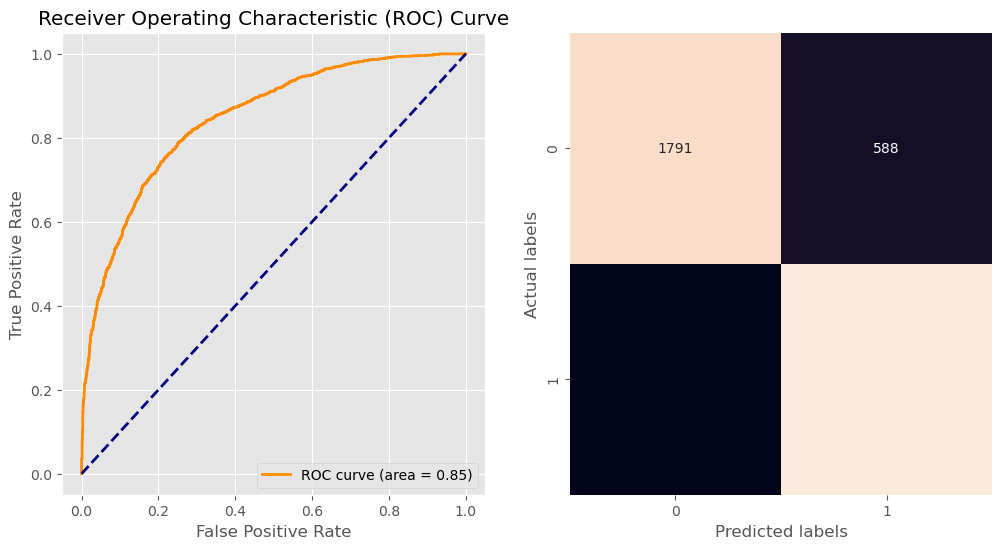

{'max_iter': [100, 200, 300, 400, 500], 'solver': ['newton-cg', 'liblinear']}
{'max_iter': [100], 'solver': ['liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Best Parameters:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy:  0.7675744141861938
F1 Score:  0.7675350903656297
AUC(ROC):  0.7676381655858567

Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      2379
           1       0.76      0.78      0.77      2358

    accuracy                           0.77      4737
   macro avg       0.77      0.77      0.77      4737
weighted avg       0.77      0.77      0.77      4737



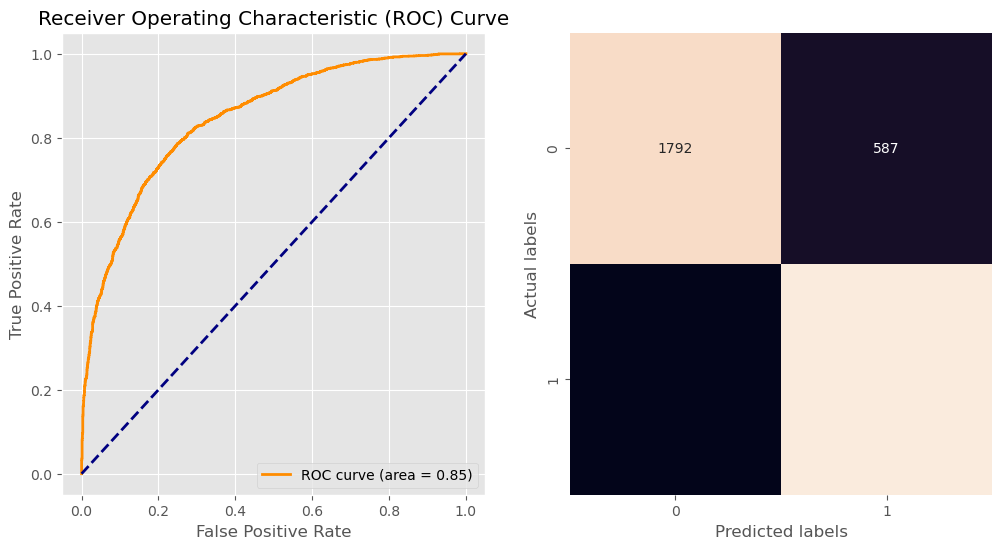

In [28]:
log_reg_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'liblinear'],
    'max_iter': [100, 200, 300, 400, 500]
}

log_reg_param_grid_phase = [{'max_iter': [100, 200, 300, 400, 500], 'solver': ['newton-cg', 'liblinear']}, {'penalty': ['l1', 'l2', 'elasticnet'],'C': [0.001, 0.01, 0.1, 1, 10, 100],}]

model_lr = LogisticRegression()
lr_features = find_bestKfeatures(model_lr, score_func=f_classif)
X_train_lr, X_test_lr = X_train[:, lr_features], X_test[:, lr_features]
time_start = time.time()
model_sample, acc_sample, f1_sample, roc_auc_sample, param_sample = train_model_with_random_search(model_lr, log_reg_param_grid, X_train_lr, y_train, X_test_lr, y_test, cv)
model_phase, acc_phase, f1_phase, roc_auc_phase, param_phase = train_model_with_phase_search(model_lr, log_reg_param_grid_phase, X_train_lr, y_train, X_test_lr, y_test, cv)
time_taken_lr = time.time() - time_start
if acc_sample >= acc_phase:
    model_lr, acc_lr, f1_lr, roc_auc_lr, param_lr = model_sample, acc_sample, f1_sample, roc_auc_sample, param_sample
else:
    model_lr, acc_lr, f1_lr, roc_auc_lr, param_lr = model_phase, acc_phase, f1_phase, roc_auc_phase, param_phase

In [29]:
print('Best Parameters: ', param_lr)
print("Time Taken: ", round(time_taken_lr, 2), ' Seconds')

Best Parameters:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Time Taken:  3.19  Seconds


# Arbol de decision

K: 1, score: 0.6791218070508761
K: 2, score: 0.6742664133417775
K: 3, score: 0.6702554359299134
K: 4, score: 0.6609668566603335
K: 5, score: 0.6584336077686299
K: 6, score: 0.6639223137006545
K: 7, score: 0.6689888114840616
K: 8, score: 0.661811272957568
K: 9, score: 0.6632890014777285
K: 10, score: 0.6637112096263458
K: 11, score: 0.6658222503694321
K: 12, score: 0.664766729997889
K: 13, score: 0.6755330377876293
K: 14, score: 0.6778551826050243
K: 15, score: 0.672788684821617
K: 16, score: 0.6767996622334811
K: 17, score: 0.6706776440785307
K: 18, score: 0.6782773907536416
K: 19, score: 0.666455562592358
K: 20, score: 0.6668777707409753
K: 21, score: 0.671099852227148
K: 22, score: 0.6721553725986912
K: 23, score: 0.6654000422208148
K: 24, score: 0.6721553725986912
K: 25, score: 0.6717331644500739
K: 26, score: 0.6643445218492717
K: 27, score: 0.6611779607346422
K: 28, score: 0.6575891914713954
K: 29, score: 0.6605446485117162
K: 30, score: 0.6670888748152839
K: 31, score: 0.65991133

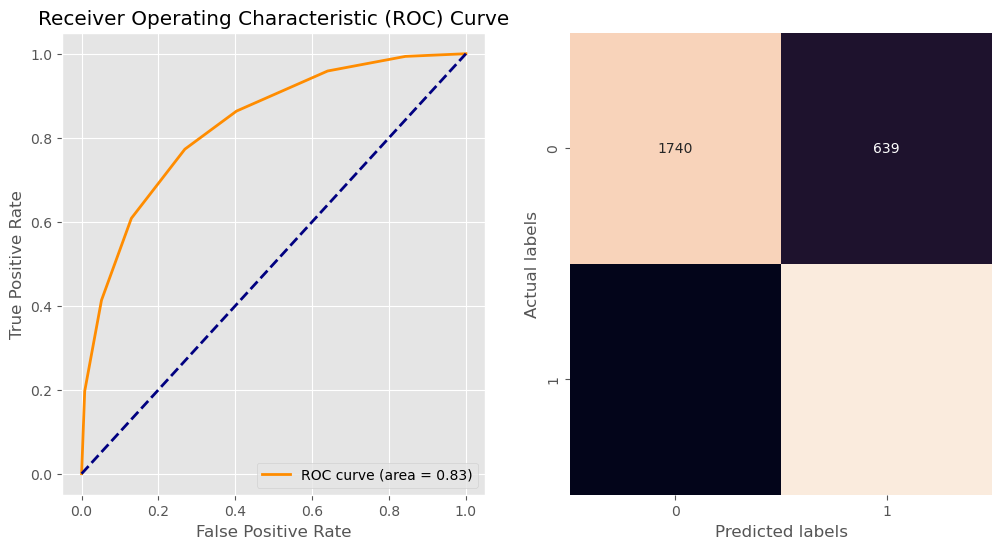

{'splitter': ['best'], 'max_depth': [None, 3, 4, 5, 10, 20, 30, 40, 50]}
{'max_depth': [3], 'splitter': ['best'], 'criterion': ['gini', 'entropy']}
{'criterion': ['gini'], 'max_depth': [3], 'splitter': ['best'], 'min_samples_split': [10, 15, 20], 'min_samples_leaf': [1, 2, 4]}
Best Parameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy:  0.7519527126873549
F1 Score:  0.7518593208440385
AUC(ROC):  0.7520442335233976

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      2379
           1       0.74      0.77      0.76      2358

    accuracy                           0.75      4737
   macro avg       0.75      0.75      0.75      4737
weighted avg       0.75      0.75      0.75      4737



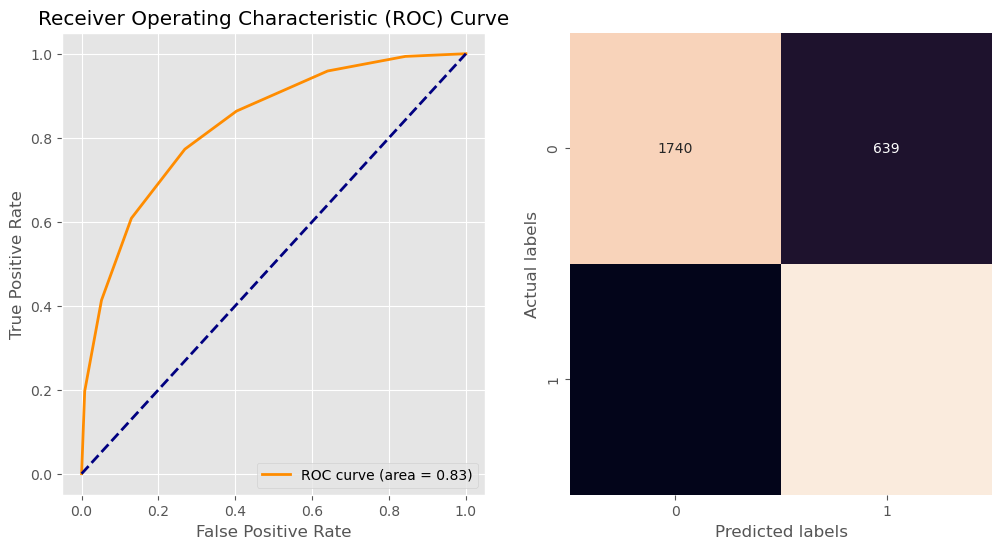

In [30]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [None, 3, 4, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [1, 2, 4]
}
dt_param_grid_phase = [{'splitter': ['best'], 'max_depth': [None, 3, 4, 5, 10, 20, 30, 40, 50]}, {'criterion': ['gini', 'entropy']}, {'min_samples_split': [10, 15, 20],'min_samples_leaf': [1, 2, 4]}]
model_dt = DecisionTreeClassifier()
dt_features = find_bestKfeatures(model_dt, score_func=f_classif)
X_train_dt, X_test_dt = X_train[:, dt_features], X_test[:, dt_features]
time_start = time.time()
model_sample, acc_sample, f1_sample, roc_auc_sample, param_sample = train_model_with_random_search(model_dt, dt_param_grid, X_train_dt, y_train, X_test_dt, y_test, cv)
model_phase, acc_phase, f1_phase, roc_auc_phase, param_phase = train_model_with_phase_search(model_dt, dt_param_grid_phase, X_train_dt, y_train, X_test_dt, y_test, cv)
time_taken_dt = time.time() - time_start
if acc_sample >= acc_phase:
    model_dt, acc_dt, f1_dt, roc_auc_dt, param_dt = model_sample, acc_sample, f1_sample, roc_auc_sample, param_sample
else:
    model_dt, acc_dt, f1_dt, roc_auc_dt, param_dt = model_phase, acc_phase, f1_phase, roc_auc_phase, param_phase

In [31]:
print('Best Parameters: ', param_dt)
print("Time Taken: ", round(time_taken_dt, 2), ' Seconds')

Best Parameters:  {'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'gini'}
Time Taken:  0.74  Seconds


In [32]:
accuracies = [acc_lr, acc_dt]
f_score = [f1_lr, f1_dt,]
roc_auc = [roc_auc_lr, roc_auc_dt]
time = [time_taken_lr, time_taken_dt]

final_df = pd.DataFrame({"Accuracies": accuracies, "F1 Scores": f_score, "ROC AUC": roc_auc, "Time Taken": time},
                       index = ['LogisticReg', 'DecisionTree'])
final_df = final_df.round(2)
final_df

Accuracies  F1 Scores  ROC AUC  Time Taken
LogisticReg         0.77       0.77     0.77        3.19
DecisionTree        0.75       0.75     0.75        0.74

# Predecir

### Class

In [33]:
from InfoLolRequest import InfoLolRequest

### Next

In [34]:
lolInfo = InfoLolRequest(api_key = "RGAPI-f15fc11a-d5ad-4dd1-a18a-734003f29320", nombre_jugador = "MachapeTactico13")
matches = lolInfo.requestMatches()

In [42]:
vector = lolInfo.getVectorData(matches[1])
vector

{'matchID': ['LA1_1517476922'],
 'blueTeamControlWardsPlaced': [0],
 'blueTeamWardsPlaced': [0],
 'blueTeamTotalKills': [47],
 'blueTeamDragonKills': [0],
 'blueTeamHeraldKills': [0],
 'blueTeamTowersDestroyed': [0],
 'blueTeamInhibitorsDestroyed': [0],
 'blueTeamTurretPlatesDestroyed': [0],
 'blueTeamFirstBlood': [False],
 'blueTeamMinionsKilled': [190],
 'blueTeamJungleMinions': [0],
 'blueTeamTotalGold': [60458],
 'blueTeamXp': [80836],
 'blueTeamTotalDamageToChamps': [1928],
 'redTeamControlWardsPlaced': [0],
 'redTeamWardsPlaced': [0],
 'redTeamTotalKills': [67],
 'redTeamDragonKills': [0],
 'redTeamHeraldKills': [0],
 'redTeamTowersDestroyed': [4],
 'redTeamInhibitorsDestroyed': [1],
 'redTeamTurretPlatesDestroyed': [0],
 'redTeamMinionsKilled': [202],
 'redTeamJungleMinions': [0],
 'redTeamTotalGold': [67104],
 'redTeamXp': [93584],
 'redTeamTotalDamageToChamps': [11327],
 'blueWin': [False]}

In [43]:
predictDataFrame = pd.DataFrame(vector)
predictDataFrame.rename(columns={'blueTeamTurretPlatesDestroyed': 'redTeamTurretPlatesDestroyed', 'redTeamTurretPlatesDestroyed': 'blueTeamTurretPlatesDestroyed'}, inplace=True)
remove1 = predictDataFrame[predictDataFrame['blueTeamTurretPlatesDestroyed'] > 15].index
predictDataFrame.drop(remove1, inplace=True)
remove2 = predictDataFrame[predictDataFrame['redTeamTurretPlatesDestroyed'] > 15].index
predictDataFrame.drop(remove2, inplace=True)
predictDataFrame['diffMinionsKilled'] = (predictDataFrame['blueTeamMinionsKilled'] - predictDataFrame['redTeamMinionsKilled'])
predictDataFrame['diffJungleMinions'] = (predictDataFrame['blueTeamJungleMinions'] - predictDataFrame['redTeamJungleMinions'])
predictDataFrame['diffTotalGold'] = (predictDataFrame['blueTeamTotalGold'] - predictDataFrame['redTeamTotalGold'])
predictDataFrame['diffTotalKills'] = (predictDataFrame['blueTeamTotalKills'] - predictDataFrame['redTeamTotalKills'])
predictDataFrame['diffXp'] = (predictDataFrame['blueTeamXp'] - predictDataFrame['redTeamXp'])
predictDataFrame['diffTotalDamageToChamps'] = (predictDataFrame['blueTeamTotalDamageToChamps'] - predictDataFrame['redTeamTotalDamageToChamps'])
predictDataFrame['diffDragonKills'] = (predictDataFrame['blueTeamDragonKills'] - predictDataFrame['redTeamDragonKills'])
predictDataFrame['diffHeraldKills'] = (predictDataFrame['blueTeamHeraldKills'] - predictDataFrame['redTeamHeraldKills'])
predictDataFrame['diffTowersDestroyed'] = (predictDataFrame['blueTeamTowersDestroyed'] - predictDataFrame['redTeamTowersDestroyed'])
predictDataFrame['diffInhibitorsDestroyed'] = (predictDataFrame['blueTeamInhibitorsDestroyed'] - predictDataFrame['redTeamInhibitorsDestroyed'])
predictDataFrame['diffTurretPlatesDestroyed'] = (predictDataFrame['blueTeamTurretPlatesDestroyed'] - predictDataFrame['redTeamTurretPlatesDestroyed'])

In [44]:
predictDataFrame[feature_lable]

blueTeamControlWardsPlaced  blueTeamWardsPlaced  blueTeamTotalKills  blueTeamDragonKills  blueTeamHeraldKills  blueTeamTowersDestroyed  blueTeamInhibitorsDestroyed  blueTeamTurretPlatesDestroyed  blueTeamFirstBlood  blueTeamMinionsKilled  blueTeamJungleMinions  blueTeamTotalGold  blueTeamXp  blueTeamTotalDamageToChamps  redTeamControlWardsPlaced  redTeamWardsPlaced  redTeamTotalKills  redTeamDragonKills  redTeamHeraldKills  redTeamTowersDestroyed  redTeamInhibitorsDestroyed  redTeamTurretPlatesDestroyed  redTeamMinionsKilled  redTeamJungleMinions  redTeamTotalGold  redTeamXp  redTeamTotalDamageToChamps  diffMinionsKilled  diffJungleMinions  diffTotalGold  diffTotalKills  diffXp  diffTotalDamageToChamps  diffDragonKills  diffHeraldKills  diffTowersDestroyed  diffInhibitorsDestroyed  diffTurretPlatesDestroyed
0                           0                    0                  47                    0                    0                        0                            0                              0               False                    190                      0              60458       80836                         1928                          0                   0                 67                   0                   0                       4                           1                             0                   202                     0             67104      93584                       11327                -12                  0          -6646             -20  -12748                    -9399                0                0                   -4                       -1                          0

In [45]:
# Hacemos predicciones usando el modelo entrenado
predicciones = model_lr.predict(predictDataFrame[feature_lable])

# Imprimimos las predicciones
print("Predicciones:")
for prediccion in predicciones:
    print(prediccion)

Predicciones:
0
